In [1]:
from matplotlib.ticker import ScalarFormatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
pd.options.mode.chained_assignment = None  # default='warn'
warnings.filterwarnings("ignore", message=r"elementwise", category=FutureWarning)

In [2]:
class Run:
    
    def __init__(self, run_number: int, tag: str):
        
        input_path = '/lustre/cmswork/nlai/DATA/drift_distributions/'
        
        self.run_number = run_number
        self.tag = tag
        self.input_file = input_path + f'RUN00{self.run_number}_{self.tag}_hstat_condor.txt'
    
    def __repr__(self):
        return f'Run: {self.run_number}\nDistribution: {self.tag}'
    
    @property
    def data_file(self):
        return self.input_file

In [3]:
def change_legend(ax, new_loc, fontsize, titlesize, **kws):
        '''funzione per modificare posizione e font size della legenda generata da seaborn'''

        old_legend = ax.legend_
        handles = old_legend.legendHandles
        labels = [t.get_text() for t in old_legend.get_texts()]
        title = old_legend.get_title().get_text()

        ax.legend(handles, labels, loc=new_loc, title=title, fontsize=fontsize, title_fontsize=titlesize, frameon = True, fancybox = False, framealpha = 0.5, **kws)

        return

In [22]:
def make_plot(df, run_number, left_bound, right_bound, save_flag = False, plot_name = None):
    
    fig, ax = plt.subplots(figsize=(14,8))

#     ax = sns.histplot(x=df[(df['DRIFT_TIME'] > left_bound) & (df['DRIFT_TIME'] < right_bound)]['DRIFT_TIME'],  bins=100, 
#                         stat='count', element='bars', fill=True, color='#009cff', edgecolor='white',
#                          label='raw distribution')
    
    ax = sns.histplot(x=df[(df['DRIFT_TIME'] > left_bound) & (df['DRIFT_TIME'] < right_bound)]['DRIFT_TIME']+100,  bins=100, 
                         stat='count', element='bars', fill=True, color='#FF6800', edgecolor='white',
                         label='shifted distribution')
    
    ax.set_xlim(left_bound, right_bound)
    
    ax.set_title(f'Drift Time Distribution - RUN{run_number}', fontsize = 32)
    ax.set_xlabel('Drift Time [ns]', fontsize = 28)
    ax.set_ylabel('Counts', fontsize = 28)
    
    ax.tick_params(axis = 'both', which = 'major', labelsize = 24, direction = 'out', length = 5)
    ax.yaxis.get_offset_text().set_fontsize(24)
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
    
    ax.legend()
    change_legend(ax=ax, new_loc="upper right", fontsize=22, titlesize=0)

    fig.tight_layout()
    
    if save_flag:
         fig.savefig(f'/lustre/cmswork/nlai/PLOTS/DRIFT_TIME/thesis/{plot_name}.pdf', facecolor = 'white')
    elif not save_flag:
        pass
    
    plt.show()
    return
    

In [15]:
run_raw = Run(1266, 'raw')
df_raw = pd.read_csv(run_raw.data_file, sep=' ')

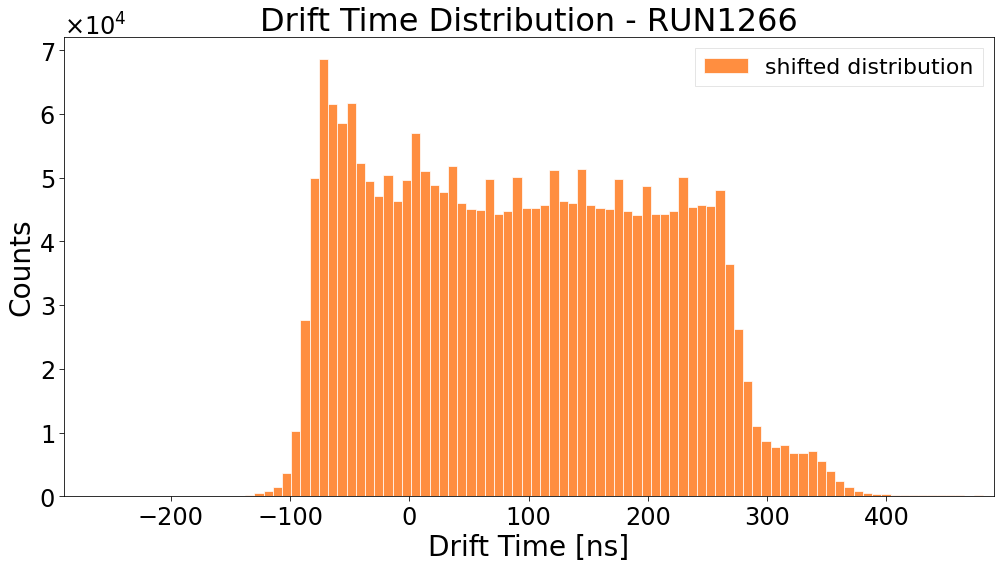

In [23]:
make_plot(df=df_raw, run_number=run_raw.run_number, left_bound=-290, right_bound=490, save_flag=False, plot_name='run1266_shifted')

mancano le run 1264, 1265, 1251, 1253